In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style

In [2]:
# Now Load the dataset
data= fetch_20newsgroups()
# Get the text categories in action
text_categories= data.target_names
print(text_categories)
# Now we define the training set
train_data = fetch_20newsgroups(subset="train", categories=text_categories)
# define the test set
test_data = fetch_20newsgroups(subset="test", categories=text_categories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
print("Number of unique classes {}".format(len(text_categories)))
print("Number of training samples {} ".format(len(train_data.data)))
print("Number of test samples {}".format(len(test_data.data)))

Number of unique classes 20
Number of training samples 11314 
Number of test samples 7532


In [4]:
# Model building
model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())
# Training the model with the training data
model.fit(train_data.data, train_data.target)
# Predicting the test data categories
predicted_categories = model.predict(test_data.data)

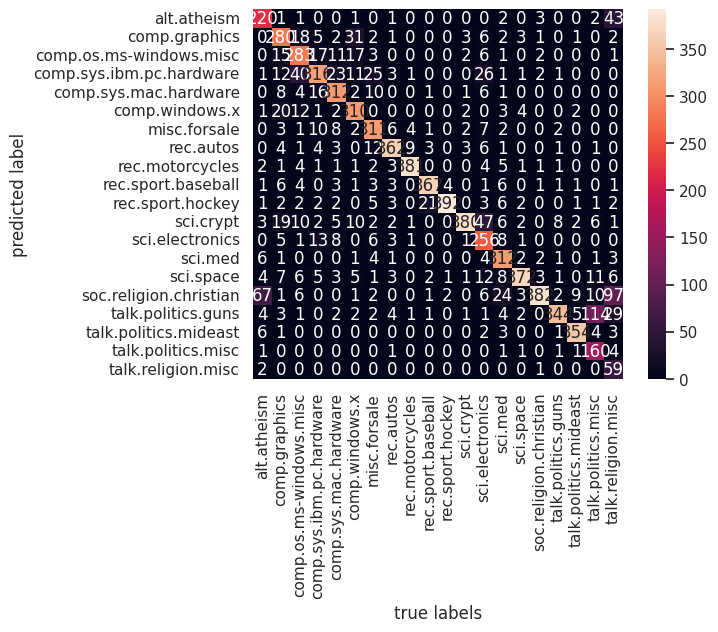

In [5]:
# plotting the confusion matrix
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("Accuracy: {}".format(accuracy_score(test_data.target, predicted_categories)))

In [6]:
# Model building
model = make_pipeline(CountVectorizer(binary=True), MultinomialNB())
# Training the model with the training data
model.fit(train_data.data, train_data.target)
# Predicting the test data categories
predicted_categories1 = model.predict(test_data.data)


Accuracy: 0.8169144981412639


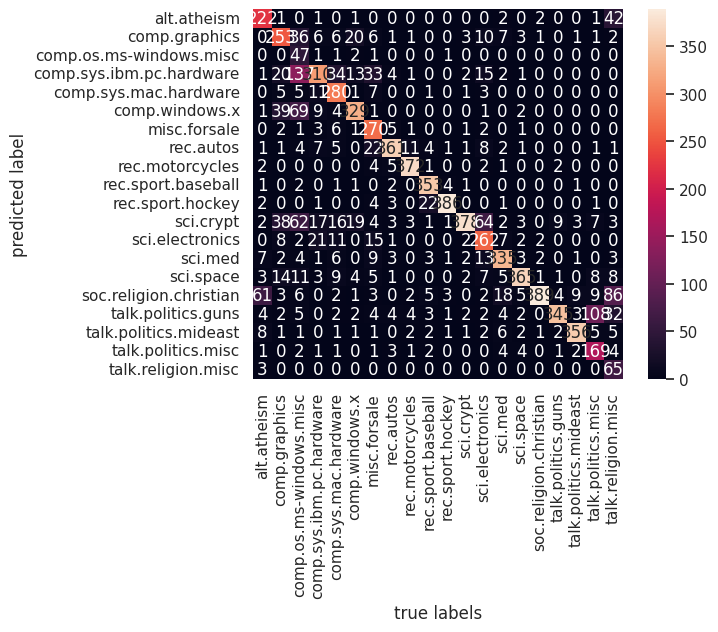

Accuracy: 0.8169144981412639


In [7]:
# plotting the confusion matrix
mat = confusion_matrix(test_data.target, predicted_categories1)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("Accuracy: {}".format(accuracy_score(test_data.target, predicted_categories)))